In [1]:
# used to reload utils everytime a new function is added
import imp
from utils import utils
imp.reload(utils)  

# Data 
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
from matplotlib import pyplot as plt, __version__

#others
import sys

## Stack of technologies

In [2]:
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", __version__)
print("Python version: ", sys.version)

Pandas version:  0.23.4
Numpy version:  1.15.4
Matplotlib version:  3.0.2
Python version:  3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
credit_data = pd.read_csv('../data_in/credit-data.csv')

In [4]:
# Rename column with borrower's ids
credit_data = credit_data.rename(columns={'unnamed: 0': 'borrower_id'})

## Data Exploration

In [5]:
credit_data.sample(10)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
143900,143901,1,0.802488,28,2,0.784189,2200.0,15,1,0,0,0.0
2969,2970,0,0.000717,45,0,0.291405,12250.0,9,0,2,0,2.0
125175,125176,0,0.038428,36,0,1172.000000,NaN,15,0,0,0,0.0
134310,134311,0,0.000000,48,4,0.100707,14000.0,10,0,0,0,0.0
65024,65025,0,0.298284,30,0,0.728965,2685.0,6,0,1,0,2.0
136238,136239,0,0.039251,39,0,0.368754,6323.0,7,0,2,0,2.0
100557,100558,0,0.717131,47,0,0.199406,2020.0,2,1,0,1,2.0
96143,96144,1,0.498751,31,0,24.000000,NaN,1,0,0,1,0.0
8654,8655,0,0.238784,49,0,0.444502,7711.0,26,0,2,0,2.0
51503,51504,0,0.659306,37,2,0.391419,3425.0,6,2,0,0,3.0


### Check types of dataframe column values

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
borrower_id                                    150000 non-null int64
serious_dlqin2yrs                              150000 non-null int64
revolving_utilization_of_unsecured_lines       150000 non-null float64
age                                            150000 non-null int64
number_of_time30-59_days_past_due_not_worse    150000 non-null int64
debt_ratio                                     150000 non-null float64
monthly_income                                 120269 non-null float64
number_of_open_credit_lines_and_loans          150000 non-null int64
number_of_times90_days_late                    150000 non-null int64
number_real_estate_loans_or_lines              150000 non-null int64
number_of_time60-89_days_past_due_not_worse    150000 non-null int64
number_of_dependents                           150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


* Column **number_of_dependents** should be of type int64

In [7]:
credit_data['number_of_dependents'] = credit_data['number_of_dependents'].astype('int64')
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
borrower_id                                    150000 non-null int64
serious_dlqin2yrs                              150000 non-null int64
revolving_utilization_of_unsecured_lines       150000 non-null float64
age                                            150000 non-null int64
number_of_time30-59_days_past_due_not_worse    150000 non-null int64
debt_ratio                                     150000 non-null float64
monthly_income                                 120269 non-null float64
number_of_open_credit_lines_and_loans          150000 non-null int64
number_of_times90_days_late                    150000 non-null int64
number_real_estate_loans_or_lines              150000 non-null int64
number_of_time60-89_days_past_due_not_worse    150000 non-null int64
number_of_dependents                           150000 non-null int64
dtypes: float64(3), int64(9)
memory usage: 13.7 MB


### Check for duplicated entries

In [8]:
#Check size of the dataframe before drop duplicated rows
print(credit_data.shape)

(150000, 12)


In [9]:
#Drop duplicated rows
credit_data.drop_duplicates(keep='first', inplace=True)

In [10]:
#Check size of the dataframe after drop duplicated rows
print(credit_data.shape)

(150000, 12)


There are no duplicated entries in the dataset 

## Descriptive analysis

### General data overview

In [11]:
round(credit_data.describe(percentiles=[.01, .05, .10, .25, .50, .75, .90, .95, .99]), 2)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,150000.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.74
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.11
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,1500.99,0.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,7500.95,0.00,0.00,29.00,0.00,0.00,1300.00,2.00,0.00,0.00,0.00,0.00
10%,15000.90,0.00,0.00,33.00,0.00,0.03,2005.00,3.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00


At a first glance over the data some first observations can be made:
- Most of the columns have outlier values. 
- Column **serious_dlqin2yrs** seems to contain cathegorical data
- Column **monthly_income** has missing values. 

Further analysis will be made in order to choose the best way to treat missing values.

In [12]:
#Check if serious_dlqin2yrs contains cathegorical data
credit_data.serious_dlqin2yrs.unique()

array([1, 0])

**serious_dlqin2yrs** will be treated as cathegorical

['revolving_utilization_of_unsecured_lines' 'age'
 'number_of_time30-59_days_past_due_not_worse' 'debt_ratio'
 'monthly_income' 'number_of_open_credit_lines_and_loans'
 'number_of_times90_days_late' 'number_real_estate_loans_or_lines'
 'number_of_time60-89_days_past_due_not_worse' 'number_of_dependents']


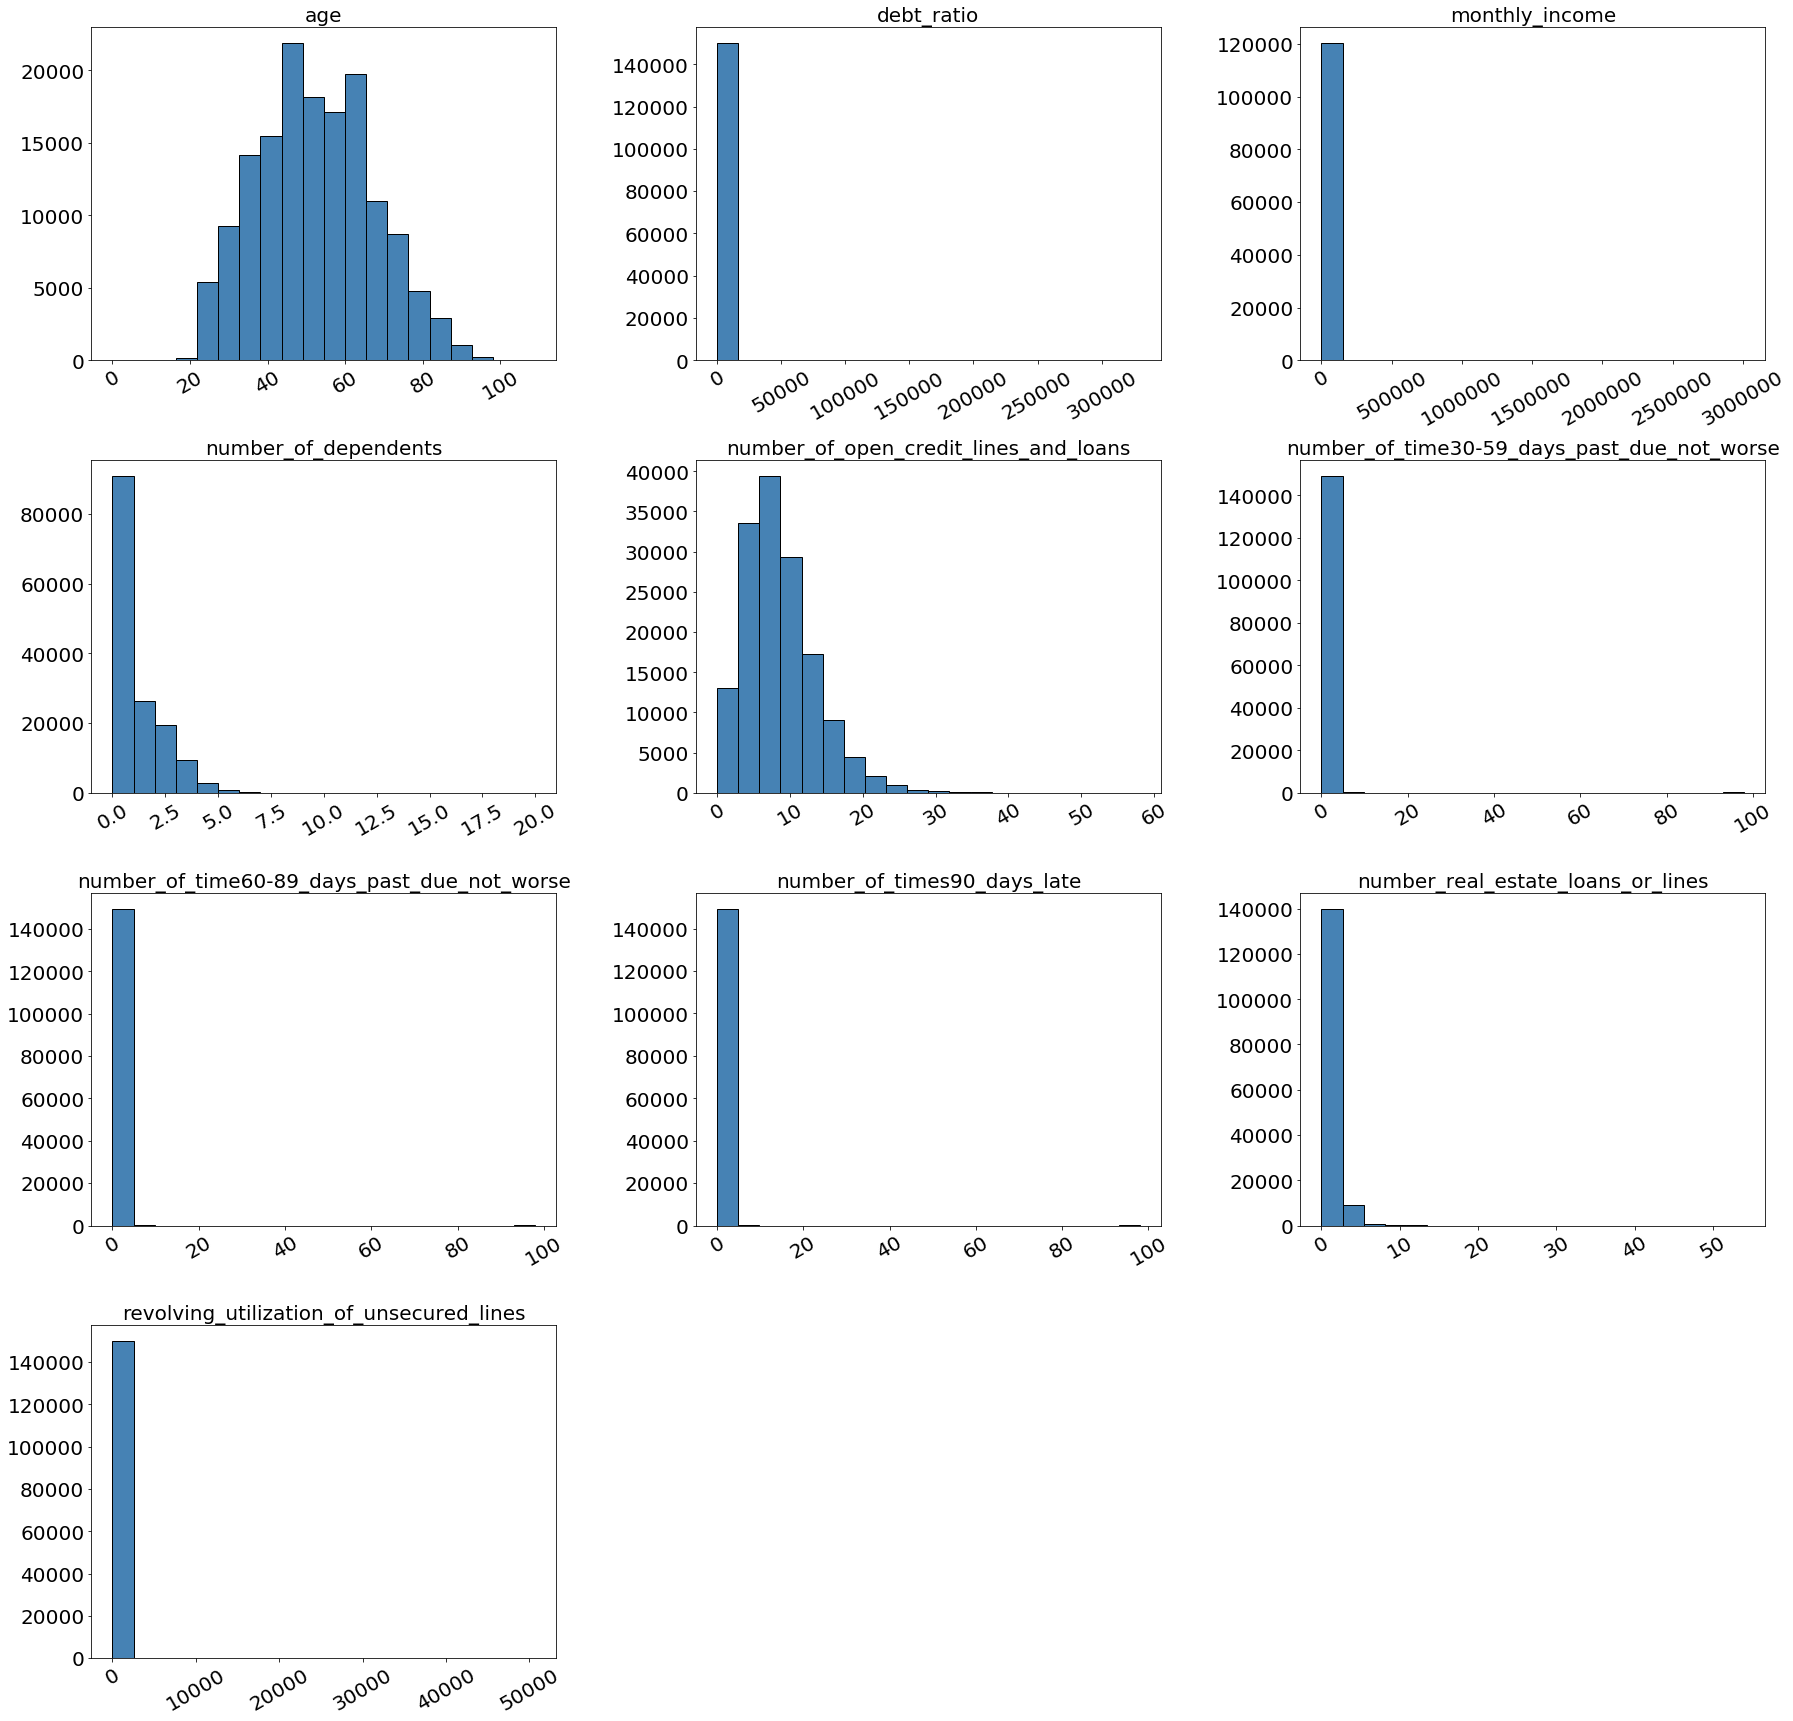

In [13]:
#Remove borrower_id and serious_dlqin2yrs columns from plotting list
columns_to_plot= credit_data.columns.values[2:]
print(columns_to_plot)

ax = credit_data[columns_to_plot].hist(bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, figsize=(30,30),
           xlabelsize=20, ylabelsize=20, grid=False);

[x.title.set_size(20) for x in ax.ravel()];
[x.tick_params('x', labelrotation=30.0) for x in ax.ravel()];
plt.show()

### Multivariate analysis

In [14]:
#pp = sns.pairplot(credit_data[columns_to_plot], height=1.8, aspect=1.8,
#                  diag_kind="hist")
#    
#fig = pp.fig 
#fig.subplots_adjust(top=0.93, wspace=0.3)
#t = fig.suptitle('credits data', fontsize=14)

## Outliers analysis

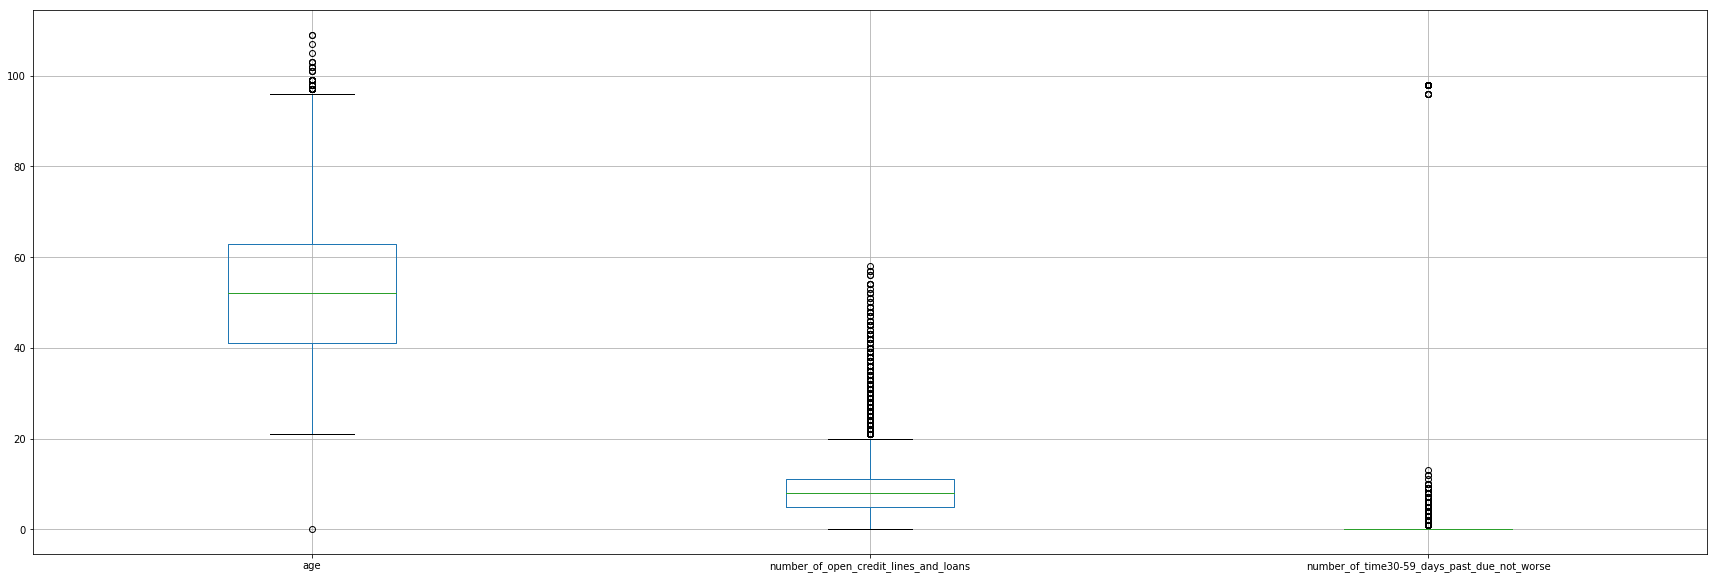

In [15]:
columns_to_plot = ['age', 'number_of_open_credit_lines_and_loans', 'number_of_time30-59_days_past_due_not_worse']
ax = credit_data[columns_to_plot].boxplot(vert=True, figsize=(30,10));

Some obvious outliers can be observed in the Age column in the number_of_open_credit_lines_and_loans column deeper analysis is needed

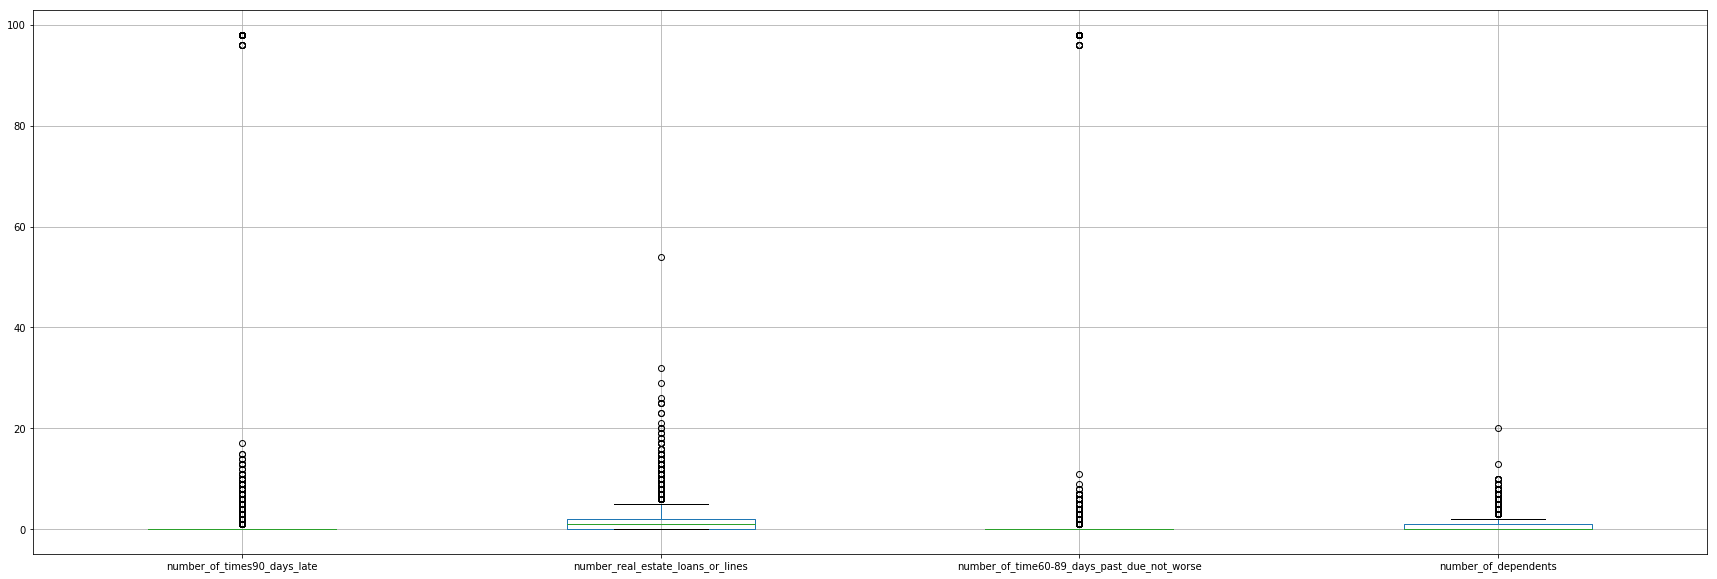

In [16]:
columns_to_plot = ['number_of_times90_days_late', 'number_real_estate_loans_or_lines',
                   'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents']
ax = credit_data[columns_to_plot].boxplot(vert=True, figsize=(30,10));

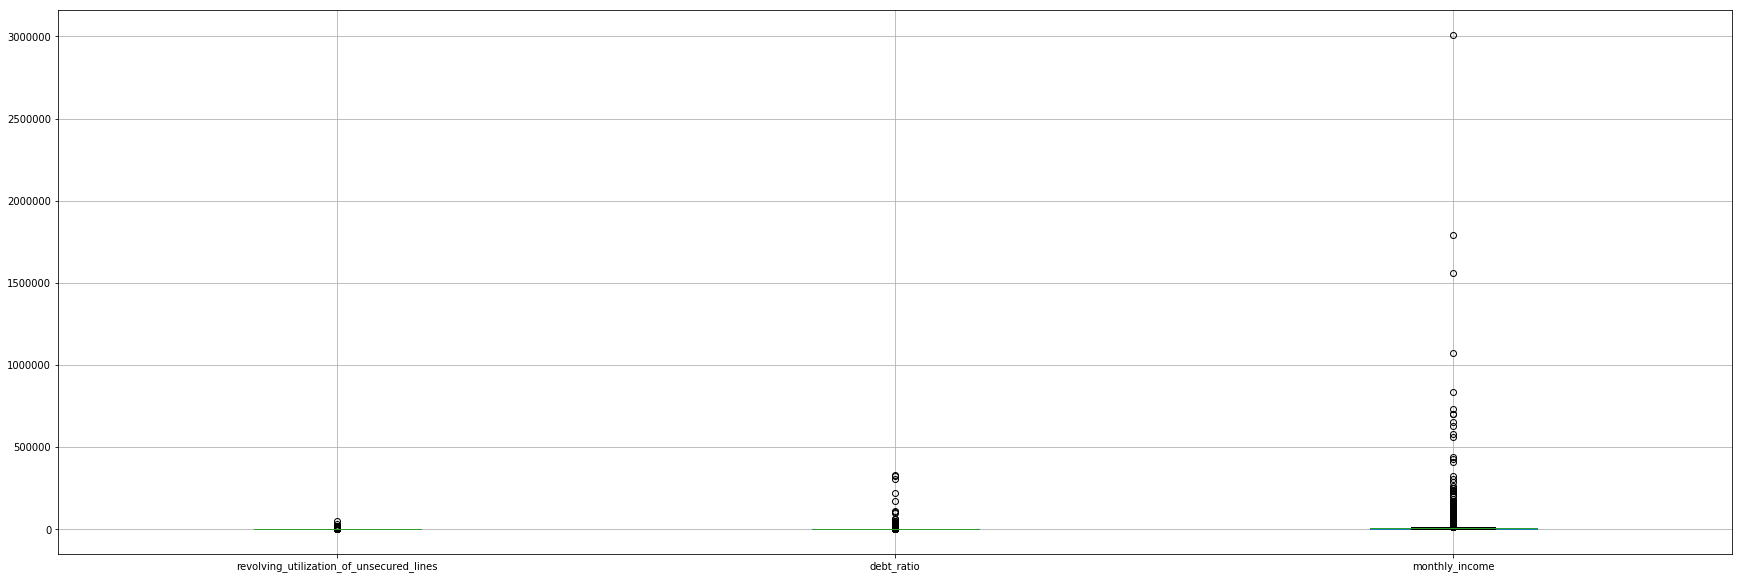

In [17]:
columns_to_plot = ['revolving_utilization_of_unsecured_lines', 'debt_ratio', 'monthly_income']
ax = credit_data[columns_to_plot].boxplot(vert=True, figsize=(30,10));

# Outlier evaluation

Paricular evaluation will be carry on for each column (or group of columns) in order to deal with outliers. It wil be used two methods to indentify outliers. 

 - method 1:
     * upper_limit: q3 + 1.5 * IQR (interquartile range)
     * lower_limit: q1 - 1.5 * IQR
 
 
 - method 2:
     Use quantiles
     * data points that lies above quantile 95 or 99
     * data points that lies belowe quantile 01 or 05

## Column Age

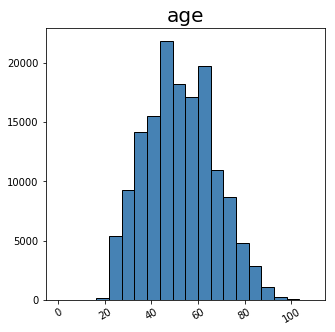

In [18]:
ax = credit_data[['age']].hist(bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, figsize=(5,5),
           xlabelsize=10, ylabelsize=10, grid=False);

[x.title.set_size(20) for x in ax.ravel()];
[x.tick_params('x', labelrotation=30.0) for x in ax.ravel()];
plt.show()

In [19]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['age'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: 8.0
upper_bound: 96.0
quantile 1: 24.0
quantile 5: 29.0
quantile 95: 78.0
quantile 99: 87.0


### Lower bound

In [20]:
# outliers bellow lower bound using method 1
credit_data.loc[(credit_data.age < lower_bound)]

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2


a borrower with an age of 0 if clearly an outlier never the less, a low limit of 8 years old does not seem to be fine neighter. Quantiles 1 or 5 will be analyzed to see if any of them it is a better choise as lower limit.

In [21]:
# outliers bellow lower bound using method 2
round(100 * (credit_data.loc[(credit_data.age < q01)].shape[0] / credit_data.shape[0]), 2)

0.84

In [22]:
# outliers bellow lower bound using method 3
round(100 * (credit_data.loc[(credit_data.age < q05)].shape[0] / credit_data.shape[0]), 2)

4.75

Both quantiles discriminate lot of data:
* q01 discrimate 0.84% of the borrowers
* q05 discriminate 4.75% of the bororowers

q05 takes as outliers a lot of borrowers that are in an age in which most people has finantial activities, so it will be discarded as lower bound. The amount of borrowers betweetn 18 years old and q01 will be analyze in order to set the lower bound. The amount of borrowers bellow 18 will be analyze too.

In [23]:
credit_data.loc[(credit_data.age>=18) & (credit_data.age < q01)].shape[0]

1258

In [24]:
credit_data.loc[(credit_data.age<18)].shape[0]

1

Given that the only outlier under 18 it is the same that is detected using the IQR method. **Method 1** will be the chosen one to deal with outliers in the age column

### Upper bound

In [25]:
credit_data.loc[(credit_data.age > upper_bound)].age.value_counts(dropna=False)

97     17
99      9
98      6
103     3
102     3
101     3
109     2
107     1
105     1
Name: age, dtype: int64

In [26]:
credit_data.loc[(credit_data.age > q99)].age.value_counts(dropna=False)

88     313
89     276
90     198
91     154
92      93
93      87
94      47
95      45
96      18
97      17
99       9
98       6
101      3
102      3
103      3
109      2
107      1
105      1
Name: age, dtype: int64

In [27]:
credit_data.loc[(credit_data.age > q95)].age.value_counts(dropna=False)

79     981
80     876
81     774
82     647
83     512
85     483
84     480
86     407
87     357
88     313
89     276
90     198
91     154
92      93
93      87
94      47
95      45
96      18
97      17
99       9
98       6
103      3
101      3
102      3
109      2
105      1
107      1
Name: age, dtype: int64

Given the Outlier's distribution using each method. The most suitable method to choose the upper bound it is method 1.

### Outliers treatment

Age outliers will be mark as NaN since there is no evidence that this data is reliable.

In [28]:
credit_data = utils.treat_outliers(data_in=credit_data, column_names=['age'], method='whiskers', value='remove')

/Users/rbechler/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


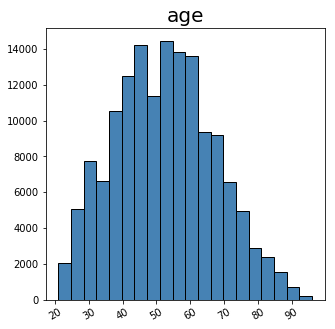

In [29]:
ax = credit_data[['age']].hist(bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, figsize=(5,5),
           xlabelsize=10, ylabelsize=10, grid=False);

[x.title.set_size(20) for x in ax.ravel()];
[x.tick_params('x', labelrotation=30.0) for x in ax.ravel()];
plt.show()

## Column number_of_open_credit_lines_and_loans

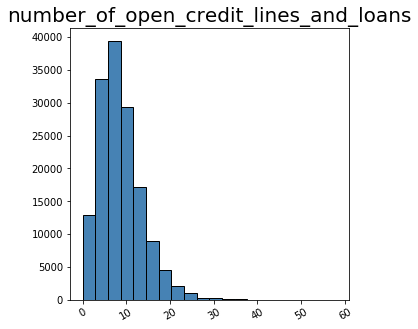

In [31]:
ax = credit_data[['number_of_open_credit_lines_and_loans']].hist(bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, figsize=(5,5),
           xlabelsize=10, ylabelsize=10, grid=False);

[x.title.set_size(20) for x in ax.ravel()];
[x.tick_params('x', labelrotation=30.0) for x in ax.ravel()];
plt.show()

In [32]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['number_of_open_credit_lines_and_loans'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: -4.0
upper_bound: 20.0
quantile 1: 0.0
quantile 5: 2.0
quantile 95: 18.0
quantile 99: 24.0
